## **Netflix**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np

1.1 Visual general de los datos

In [2]:
data_netflix = pd.read_csv('../src:data/Data_Netflix/datos_netflix.csv')

print("Filas, columnas:", data_netflix.shape)
data_netflix.head()

Filas, columnas: (5806, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [3]:
# Tipo de dato
data_netflix.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_netflix.isna().sum()

#!Tenemos un null en los títulos

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [5]:
# Nulls en porcentaje
for i in data_netflix.isna().sum():
    print((i/data_netflix.shape[0])*100)

#Destacamos que el 65%% de los valores de la columna season son nulos, pero como representan el numero de temporadas, no nos importa mucho, y podría tener sentido
#También destacamos que el 45% de los valores de age_certification son nulos, podría no ser muy útil esta columna

0.0
0.01722356183258698
0.0
0.3100241129865656
0.0
44.95349638305201
0.0
0.0
0.0
64.74336892869445
7.647261453668619
9.00792283844299
9.28349982776438
1.619014812263176
5.47709266276266


In [6]:
import seaborn as sns

<AxesSubplot:>

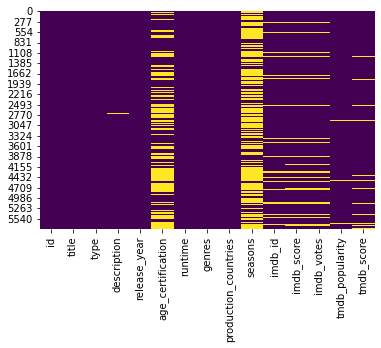

In [7]:
sns.heatmap(data_netflix.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores




In [8]:
print(data_netflix.columns)
print("N columnas:", len(data_netflix.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [9]:
# Título 
# 1 NaN --> decidimos eliminarlo por la falta de información en el resto de columnas
data_netflix[data_netflix['title'].isna() == True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [10]:
# Duplicados
print("n titulos:", data_netflix.shape[0])  
titulos_duplicados = data_netflix.loc[data_netflix.duplicated(['title'])]
print("n duplicados:", len(titulos_duplicados))
titulos_unicos = data_netflix['title'].nunique()
print("n titulos unicos:", titulos_unicos)

n titulos: 5806
n duplicados: 54
n titulos unicos: 5751


In [11]:
# Tenemos 54 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y duración:

print("n duplicados:", data_netflix[data_netflix.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_netflix[data_netflix.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

n duplicados: 0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [12]:
# Al no haber ningún contenido duplicado, eliminamos solo el valor nulo
data_netflix1 = data_netflix.dropna(subset=['title'], ).copy().reset_index(drop=True)
data_netflix1.shape

(5805, 15)

In [13]:
#Comprobamos el índice después de eliminar el NaN
data_netflix.iloc[1804: 1807, :3]


,id,title,type
1804,tm860487,Pac’s Scary Halloween,MOVIE
1805,tm1063792,NaN,MOVIE
1806,ts53513,Back to 1989,SHOW


In [14]:
data_netflix1.iloc[1804: 1807, :3]

,id,title,type
1804,tm860487,Pac’s Scary Halloween,MOVIE
1805,ts53513,Back to 1989,SHOW
1806,tm232090,Snervous Tyler Oakley,MOVIE


In [15]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_netflix2 = data_netflix1.drop(['imdb_id', 'description'], axis=1).copy()
data_netflix2.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7


In [16]:
data_netflix2.shape[1]

13

In [17]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y difernciar por contenido exclusivo 
# (por eso no eliminamos esta columna)
print("Valores unicos:", data_netflix2['id'].nunique())
print("n filas:", data_netflix2['id'].shape[0])

Valores unicos: 5805
n filas: 5805


In [18]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos
data_netflix2['type'] = data_netflix2['type'].astype(str)
data_netflix2['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [19]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_netflix2['release_year'] // 10)).astype(str) + 's'
data_netflix2.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_netflix2['release_year']

In [20]:
data_netflix2.head()

,id,title,type,Decada,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1940s,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1970s,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1970s,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1970s,R,94,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1970s,R,133,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7


In [21]:
df_decadas_netflix = pd.DataFrame(data_netflix2['Decada'].value_counts())
total = df_decadas_netflix['Decada'].sum()
df_decadas_netflix['total'] = [round((i/total)*100, 2) for i in df_decadas_netflix['Decada']]
df_decadas_netflix

# A pesar de que 2020 son solo 2 años (ni eso), el contenido de la decada ya tiene un peso del 30%!

,Decada,total
2010s,3398,58.54
2020s,1780,30.66
2000s,397,6.84
1990s,133,2.29
1980s,56,0.96
1970s,23,0.40
1960s,11,0.19
1950s,6,0.10
1940s,1,0.02


In [22]:
# age_certificacion --> 45% valores nulos
print("Valores NaN:", len(data_netflix2[data_netflix2['age_certification'].isna() == True]))
print("Valores:", len(data_netflix2[data_netflix2['age_certification'].isna() != True]))
#vemos variables para redefinirlas
print("Valores Columna Edad:", data_netflix2['age_certification'].unique())

Valores NaN: 2609
Valores: 3196
Valores Columna Edad: ['TV-MA' 'R' 'PG' 'TV-14' 'G' 'PG-13' nan 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']


In [23]:
# age_certification -> vemos variables para redefinirlas

# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 - 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 2609 valores numeros --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "G", 0, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-G", 0, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-Y", 7, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-Y7", 7, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-PG", 7, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "PG", 7, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "PG-13", 13, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-14", 13, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "R", 17, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "NC-17", 17, data_netflix2['age_certification'])
data_netflix2['age_certification'] = np.where(data_netflix2['age_certification'] == "TV-MA", 17, data_netflix2['age_certification'])

In [24]:
# Asignamos el numero 9999 a los valores nulos:
data_netflix2['age_certification'] = data_netflix2['age_certification'].fillna(9999)

In [25]:
data_netflix2['age_certification'] = data_netflix2['age_certification'].astype(int)
print("Valores Columna Edad:", data_netflix2['age_certification'].unique())
print("Valores NaN:", len(data_netflix2[data_netflix2['age_certification'].isna() == True]))

Valores Columna Edad: [  17    7   13    0 9999]
Valores NaN: 0


In [26]:
df_edades_netflix = pd.DataFrame(data_netflix2['age_certification'].value_counts())
total = data_netflix2['age_certification'].value_counts().sum()
df_edades_netflix['total'] = [round((i/total)*100, 2) for i in df_edades_netflix['age_certification']]
df_edades_netflix

,age_certification,total
9999,2609,44.94
17,1430,24.63
13,910,15.68
7,649,11.18
0,207,3.57


In [27]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_netflix2['genres']:
    if "[]" in i:
        nan_genres +=1
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_netflix2.shape[0] *100, 2))

N NaN en 'genres': 67
% NaN en 'genres': 1.15


In [28]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_netflix2['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [29]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['documentation' 'crime' 'drama' 'comedy' 'fantasy' 'horror' 'european'
 'thriller' 'action' 'music' 'romance' 'family' 'western' 'war'
 'animation' 'history' 'scifi' 'reality' 'sport']
n generos: 19


In [30]:
print(data_netflix2['genres'].dtype) # --> object
print(data_netflix2['genres'].iloc[0])
type(data_netflix2['genres'].iloc[0]) #-->str
print(data_netflix2['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['documentation']
[


In [31]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_netflix2['genres'] = data_netflix2['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_netflix2['genres'] = data_netflix2['genres'].str.rsplit(pat=", ")
data_netflix2['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


'documentation'

In [32]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista
data_netflix2['genres'] = [fila[0] for fila in data_netflix2['genres']]

In [33]:
df_generos_netflix = pd.DataFrame(data_netflix2['genres'].value_counts())
total = df_generos_netflix['genres'].sum()
print("N generos:", total)
df_generos_netflix['total'] = [round((i/total)*100, 2) for i in df_generos_netflix['genres']]
df_generos_netflix

N generos: 5805


,genres,total
drama,1432,24.67
comedy,1310,22.57
documentation,588,10.13
thriller,442,7.61
action,292,5.03
scifi,289,4.98
romance,265,4.57
crime,254,4.38
animation,232,4.00
reality,176,3.03


In [34]:
df_generos_netflix['genres'].astype(str)

drama            1432
comedy           1310
documentation     588
thriller          442
action            292
scifi             289
romance           265
crime             254
animation         232
reality           176
fantasy           143
horror            121
                   67
family             66
music              50
war                43
western            22
history             9
sport               4
Name: genres, dtype: object

In [35]:
len(df_generos_netflix['genres'][df_generos_netflix['genres'] == ""])

0

In [36]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_netflix2['production_countries']:
    if "[]" in i:
        nan_countries +=1
print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_netflix2.shape[0] *100, 2))

N NaN en 'production_countries': 231
% NaN en 'production_countries': 3.98


In [37]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_netflix2['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [38]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'GB' 'JP' 'EG' 'DE' 'IN' 'DZ' 'LB' 'FR' 'CA' 'SU' 'IT' 'HK' 'AR'
 'KW' 'PE' 'BR' 'IE' 'GH' 'BF' 'ES' 'MX' 'AU' 'CO' 'BE' 'NO' 'PS' 'TR'
 'BS' 'CZ' 'IS' 'DK' 'NZ' 'CN' 'KR' 'BG' 'RU' 'SG' 'MA' 'UY' 'TW' 'MY'
 'CH' 'CL' 'NG' 'ZA' 'SA' 'AT' 'NL' 'SE' 'PH' 'Lebanon' 'TH' 'XX' 'AE'
 'HU' 'ID' 'IL' 'FI' 'RO' 'CD' 'PL' 'VE' 'UA' 'IR' 'JO' 'QA' 'LU' 'BY'
 'SK' 'HR' 'SY' 'GL' 'PT' 'PK' 'VN' 'PR' 'IQ' 'KH' 'GE' 'CU' 'KE' 'VA'
 'RS' 'AL' 'TZ' 'TN' 'ZW' 'PY' 'NP' 'GR' 'CM' 'BD' 'KG' 'LT' 'CY' 'SN'
 'MW' 'IO' 'MU' 'LK' 'AO' 'GT' 'MZ' 'AF' 'NA' 'FO']
n paises: 107


In [39]:
#Cambiamos ''Lebanon' por 'LB'
data_netflix2['production_countries'] = data_netflix2['production_countries'].replace("Lebanon", "LB")

In [40]:
data_netflix2['production_countries'][0]

#Eliminamos corchetes y comillas
data_netflix2['production_countries'] = data_netflix2['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_netflix2['production_countries'][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


'US'

In [41]:
df_paises_netflix = pd.DataFrame(data_netflix2['production_countries'].value_counts())
total_paises = df_paises_netflix['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_netflix['total'] = [round((i/total_paises)*100, 2) for i in df_paises_netflix['production_countries']]
df_paises_netflix

N paises produccion: 5805


,production_countries,total
US,1950,33.59
IN,605,10.42
JP,266,4.58
,231,3.98
GB,219,3.77
...,...,...
"PR, US, GB, CN",1,0.02
"GB, US, FR",1,0.02
"IT, ES, FR",1,0.02
"GB, US, CZ",1,0.02


In [42]:
n_varios_paises = 0

for fila in data_netflix2['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 643
Porcentaje: 11.08


In [43]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_netflix2['production_countries'] = [i[:2] for i in data_netflix2['production_countries'] if int(len(data_netflix2['production_countries']) > 2)]

In [44]:
df_paises_un_netflix = pd.DataFrame(data_netflix2['production_countries'].value_counts())
total_un_paises = df_paises_un_netflix['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_netflix['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_netflix['production_countries']]
df_paises_un_netflix

N paises produccion: 5805


,production_countries,total
US,2087,35.95
IN,619,10.66
GB,304,5.24
JP,277,4.77
,231,3.98
...,...,...
GL,1,0.02
SY,1,0.02
HR,1,0.02
SK,1,0.02


In [45]:
# Sacamos el los paises y el n paises final
print(data_netflix2['production_countries'].unique())
print(data_netflix2['production_countries'].nunique())

['US' 'GB' 'JP' 'EG' 'DE' 'IN' '' 'DZ' 'LB' 'FR' 'HK' 'AR' 'KW' 'CA' 'PE'
 'IT' 'GH' 'MX' 'AU' 'CO' 'BE' 'TR' 'DK' 'NZ' 'KR' 'BG' 'ES' 'CN' 'RU'
 'SG' 'PS' 'TW' 'MY' 'CL' 'NG' 'ZA' 'SA' 'PH' 'Le' 'TH' 'XX' 'NO' 'AE'
 'ID' 'NL' 'IL' 'AT' 'FI' 'RO' 'CD' 'BR' 'PL' 'VE' 'UA' 'IE' 'IS' 'SE'
 'BY' 'MA' 'SK' 'QA' 'HR' 'SY' 'GL' 'PK' 'CZ' 'VN' 'PR' 'IQ' 'HU' 'KH'
 'CU' 'CH' 'LU' 'KE' 'TZ' 'GE' 'ZW' 'PY' 'CM' 'KG' 'BD' 'LT' 'SN' 'MW'
 'PT' 'IO' 'MU' 'JO' 'RS' 'UY' 'AO' 'GT' 'MZ' 'AF' 'NA']
96


In [46]:
data_netflix2['production_countries'] = data_netflix2['production_countries'].replace("Le", "LB")

In [47]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma
data_netflix2['seasons'] = data_netflix2['seasons'].fillna(1)
data_netflix2['seasons'] = data_netflix2['seasons'].astype(int)

In [48]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas
print(len(data_netflix2[data_netflix2['imdb_score'].isna() == True]['imdb_votes']))

522


In [49]:
# columna imdb_score --> 552 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# Intentamos rellenar con la columna de tmdb

data_netflix2['imdb_score'] = data_netflix2['imdb_score'].fillna(data_netflix2['tmdb_popularity'])
len(data_netflix2[data_netflix2['imdb_score'].isna() == True])

# Quedan 9 datos NaN por rellenar --> --> rellenamos con 0 --> poner otro número asignaría una puntuación no real a un título
data_netflix2['imdb_score'] = data_netflix2['imdb_score'].fillna(0)
data_netflix2['imdb_score'] = data_netflix2['imdb_score'].astype(float)
len(data_netflix2[data_netflix2['imdb_score'].isna() == True])

0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas por si cambiase de opinion 

In [50]:

#columna ibdb_votes --> 538 nulos (522 también tenian puntuaciones nulas)
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_netflix2['imdb_votes'].mean())
data_netflix2['imdb_votes'] = data_netflix2['imdb_votes'].fillna(data_netflix2['imdb_votes'].mean())
data_netflix2['imdb_votes'] = data_netflix2['imdb_votes'].astype(int)


Rellenamos null con la media de votos: 23407.194987659008


In [51]:

# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_netflix2['imdb_votes'].mean(), 2) for i in data_netflix2['imdb_votes']]
data_netflix2.insert(11, 'Var_Votos', var_votos)


In [52]:
# columna tmdb_score --> 317 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener la columna de tmdb es, en caso de sesgo, poder comprobar puntuacion de tmdb

data_netflix2['tmdb_score'] = data_netflix2['tmdb_score'].fillna(0)
data_netflix2['tmdb_score'] = data_netflix2['tmdb_score'].astype(float)

In [53]:

# columna tmdb_popularity --> 93 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 

data_netflix2['tmdb_popularity'] = data_netflix2['tmdb_popularity'].fillna(0)
data_netflix2['tmdb_popularity'] = data_netflix2['tmdb_popularity'].astype(float)


In [54]:
data_netflix3 = data_netflix2.drop(['imdb_votes','Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [55]:
data_netflix3.columns

Index(['id', 'title', 'type', 'Decada', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'tmdb_score'],
      dtype='object')

In [56]:
# renombramos las columnas

data_netflix3.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [57]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_netflix3.shape)
data_netflix3.info()

Filas, columnas: (5805, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5805 non-null   object 
 1   Titulo       5805 non-null   object 
 2   Tipo         5805 non-null   object 
 3   Decada       5805 non-null   object 
 4   Edad_Recom   5805 non-null   int64  
 5   Duracion     5805 non-null   int64  
 6   Generos      5805 non-null   object 
 7   Paises_Prod  5805 non-null   object 
 8   Temporadas   5805 non-null   int64  
 9   Imdb_Puntos  5805 non-null   float64
 10  Tmdb_Puntos  5805 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 499.0+ KB


In [58]:
# Hemos eliminado 1 filas por duplicados
n_titulos_sacados = data_netflix.shape[0] - data_netflix3.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_netflix.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

1
0.02


In [59]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

netflix_series_df = data_netflix3[data_netflix3['Tipo']=='SHOW']
netflix_series_df = netflix_series_df.reset_index(drop = True)
print("n_filas_series:", netflix_series_df.shape[0])

n_filas_series: 2047


In [60]:
# Eliminamos la columna de tipo porque ya no nos interesa
del netflix_series_df['Tipo']

In [61]:
netflix_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts300399,Five Came Back: The Reference Films,1940s,17,48,documentation,US,1,0.6,0.0
1,ts22164,Monty Python's Flying Circus,1960s,13,30,comedy,GB,4,8.8,8.3
2,ts45948,Monty Python's Fliegender Zirkus,1970s,17,43,comedy,,1,8.1,7.0
3,ts20681,Seinfeld,1980s,7,24,comedy,US,9,8.9,8.3
4,ts22082,Knight Rider,1980s,7,51,action,US,4,6.9,7.5


In [62]:
netflix_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
2042,ts296698,Glimpses of a Future,2020s,7,4,,,1,0.600,0.0
2043,ts297061,Masameer County,2020s,17,23,,SA,1,0.959,8.0
2044,ts286386,The Big Day,2020s,17,45,reality,US,2,4.600,6.0
2045,ts307884,HQ Barbers,2020s,13,24,comedy,NG,1,0.600,0.0
2046,ts271048,Mighty Little Bheem: Kite Festival,2020s,9999,0,family,,1,8.800,10.0


In [63]:
netflix_peliculas_df = data_netflix3[data_netflix3['Tipo']=='MOVIE']
netflix_peliculas_df = netflix_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", netflix_peliculas_df.shape[0])
netflix_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del netflix_peliculas_df['Tipo']
del netflix_peliculas_df['Temporadas']

n_filas_peliculas: 3758


In [64]:
netflix_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts300399,Five Came Back: The Reference Films,1940s,17,48,documentation,US,1,0.6,0.0
1,ts22164,Monty Python's Flying Circus,1960s,13,30,comedy,GB,4,8.8,8.3
2,ts45948,Monty Python's Fliegender Zirkus,1970s,17,43,comedy,,1,8.1,7.0
3,ts20681,Seinfeld,1980s,7,24,comedy,US,9,8.9,8.3
4,ts22082,Knight Rider,1980s,7,51,action,US,4,6.9,7.5


In [65]:
netflix_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm84618,Taxi Driver,1970s,17,113,crime,US,8.3,8.2
1,tm127384,Monty Python and the Holy Grail,1970s,7,91,comedy,GB,8.2,7.8
2,tm70993,Life of Brian,1970s,17,94,comedy,GB,8.0,7.8
3,tm190788,The Exorcist,1970s,17,133,horror,US,8.1,7.7
4,tm14873,Dirty Harry,1970s,17,102,thriller,US,7.7,7.5


In [66]:
#Comprobamos
data_netflix3.shape[0] == netflix_peliculas_df.shape[0] + netflix_series_df.shape[0]

True

In [67]:
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [68]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [netflix_peliculas_df.shape[0], netflix_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'black',
                                 'Series':'red'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Fichero Contenidos Netflix

In [69]:
#  Pasamos las tablas a un CSV:

netflix_peliculas_df.to_csv('df_netflix_peliculas.csv', encoding='utf-8')
netflix_series_df.to_csv('df_netflix_series.csv', encoding='utf-8')